# Bike Sharing Demand
Author: Morariu Tudor

In [191]:
import pandas as pd

data = pd.read_csv("train.csv");
data.drop(columns=["casual", "registered"], inplace=True);
display(data);

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [192]:
import datetime

data['datetime'] = pd.to_datetime(data['datetime'])
data['year']= data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday

data.drop(columns=["datetime"], inplace=True);
display(data);

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,22,2


In [193]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();

counts = data["count"];
data.drop(columns="count", inplace=True);

data = pd.DataFrame(scaler.fit_transform(data), data.index, data.columns);
data["count"] = counts

<Axes: >

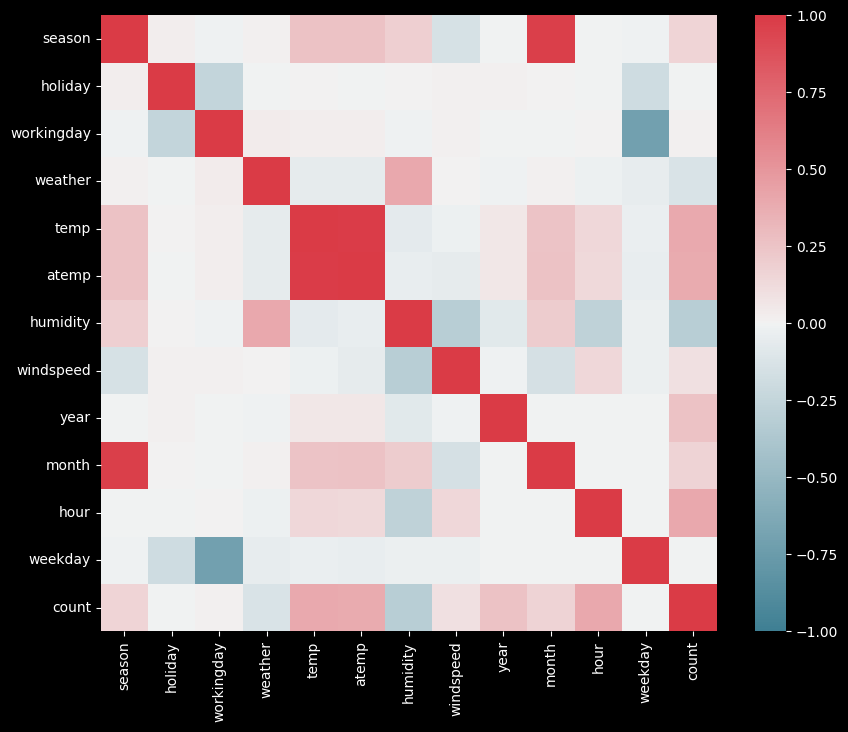

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

In [195]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression

reg_mod = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.01,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=40,
    gamma=0,
)

reg_skl = LinearRegression();

model = reg_mod.fit(data.drop(columns=["count"]), data["count"]);



In [196]:
data = pd.read_csv("test.csv");

ids = data["datetime"];

data['datetime'] = pd.to_datetime(data['datetime'])
data['year']= data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday

data.drop(columns=["datetime"], inplace=True);


scaler = MinMaxScaler();

data = pd.DataFrame(scaler.fit_transform(data), data.index, data.columns);


res = model.predict(data);

ans = pd.DataFrame(res);
ans["datetime"] = ids;
ans["count"] = ans[0].apply(lambda x: 0 if x < 0 else x);
ans.drop(columns=[0], inplace=True);

display(ans);

ans.to_csv("ans.csv", index=False);

,datetime,count
0,2011-01-20 00:00:00,82.204781
1,2011-01-20 01:00:00,78.256371
2,2011-01-20 02:00:00,74.235855
3,2011-01-20 03:00:00,74.235855
4,2011-01-20 04:00:00,74.235855
...,...,...
6488,2012-12-31 19:00:00,209.315933
6489,2012-12-31 20:00:00,177.946182
6490,2012-12-31 21:00:00,147.509064
6491,2012-12-31 22:00:00,127.013611
